## Introduction to ML:

<img src="https://cdn-images-1.medium.com/max/922/1*8Acse64iGkN17YycNyR0lw.png" style="height: 370px; width:700px;">

# Data Processing Pipline:

<img src="https://www.researchgate.net/profile/Benyamina-Hamza/publication/353620685/figure/fig1/AS:1051936119873536@1627812523439/Machine-learning-pipeline.ppm"/>

## Data Loading:

### Context
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

### content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- **sex**: 1 for female and 2 for male.
- **age**: of the patient.
- **classification**: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- **patient type**: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- **pneumonia**: whether the patient already have air sacs inflammation or not.
- **pregnancy**: whether the patient is pregnant or not.
- **diabetes**: whether the patient has diabetes or not.
- **copd**: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- **asthma**: whether the patient has asthma or not.
- **inmsupr**: whether the patient is immunosuppressed or not.
- **hypertension**: whether the patient has hypertension or not.
- **cardiovascular**: whether the patient has heart or blood vessels related disease.
- **renal chronic**: whether the patient has chronic renal disease or not.
- **other disease**: whether the patient has other disease or not.
- **obesity**: whether the patient is obese or not.
- **tobacco**: whether the patient is a tobacco user.
- **usmr**: Indicates whether the patient treated medical units of the first, second or third level.
- **medical unit**: type of institution of the National Health System that provided the care.
- **intubed**: whether the patient was connected to the ventilator.
- **icu**: Indicates whether the patient had been admitted to an Intensive Care Unit.
- **date died**: If the patient died indicate the date of death, and 9999-99-99 otherwise.

[Link to dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../../Data/Covid Data.csv')

In [3]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
data['DATE_DIED'].value_counts().head(20)

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
16/07/2020       938
14/07/2020       935
17/06/2020       926
29/06/2020       925
08/06/2020       923
09/07/2020       922
15/07/2020       916
12/06/2020       903
05/07/2020       897
14/06/2020       892
12/07/2020       889
30/06/2020       882
15/06/2020       877
08/07/2020       875
10/06/2020       873
Name: DATE_DIED, dtype: int64

In [6]:
data['DEATH'] = (data['DATE_DIED'] != '9999-99-99').values.astype(np.float64)

In [7]:
data['DEATH']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1048570    0.0
1048571    0.0
1048572    0.0
1048573    0.0
1048574    0.0
Name: DEATH, Length: 1048575, dtype: float64

In [8]:
data['DATE_DIED']

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

## Data Preprocessing:

- Dealing with mising data

- Encoding the features

[Preprocessing in Scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html)

In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are **missing** data.

In [9]:
for col in data.columns:
    if not (col in ['MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL']):
        data.loc[data[col]==99, col] = np.nan
        data.loc[data[col]==98, col] = np.nan
        data.loc[data[col]==97, col] = np.nan

In [10]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2.0,1,1.0,1.0,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1.0
1,2.0,1,2.0,1.0,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1.0
2,2.0,1,2.0,2.0,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1.0
3,2.0,1,1.0,1.0,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1.0
4,2.0,1,2.0,1.0,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,13,2.0,1.0,9999-99-99,NaN,2.0,40,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,0.0
1048571,1.0,13,2.0,2.0,9999-99-99,2.0,2.0,51,NaN,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0.0
1048572,2.0,13,2.0,1.0,9999-99-99,NaN,2.0,55,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,0.0
1048573,2.0,13,2.0,1.0,9999-99-99,NaN,2.0,28,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,0.0


In [11]:
data.isna().sum() / data.shape[0] * 100

USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
DATE_DIED                0.000000
INTUBED                 81.622106
PNEUMONIA                1.526166
AGE                      0.000000
PREGNANT                50.283957
DIABETES                 0.318337
COPD                     0.286389
ASTHMA                   0.284100
INMSUPR                  0.324631
HIPERTENSION             0.296021
OTHER_DISEASE            0.481129
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
TOBACCO                  0.307083
CLASIFFICATION_FINAL     0.000000
ICU                     81.637651
DEATH                    0.000000
dtype: float64

In [12]:
data = data.drop(columns=['INTUBED', 'PREGNANT', 'ICU'])

In [13]:
data['PNEUMONIA'].value_counts()

2.0    892534
1.0    140038
Name: PNEUMONIA, dtype: int64

In [14]:
data['PNEUMONIA'] = data['PNEUMONIA'].fillna(2.0)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  float64
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  float64
 3   PATIENT_TYPE          1048575 non-null  float64
 4   DATE_DIED             1048575 non-null  object 
 5   PNEUMONIA             1048575 non-null  float64
 6   AGE                   1048575 non-null  int64  
 7   DIABETES              1045237 non-null  float64
 8   COPD                  1045572 non-null  float64
 9   ASTHMA                1045596 non-null  float64
 10  INMSUPR               1045171 non-null  float64
 11  HIPERTENSION          1045471 non-null  float64
 12  OTHER_DISEASE         1043530 non-null  float64
 13  CARDIOVASCULAR        1045499 non-null  float64
 14  OBESITY               1045543 non-

In [16]:
data = data.dropna()

In [17]:
data.shape[0]

1041013

## Data Visualization:

[Matplotlib](https://matplotlib.org/)

[Seaborn](https://seaborn.pydata.org/)

[Plotly](https://plotly.com/)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

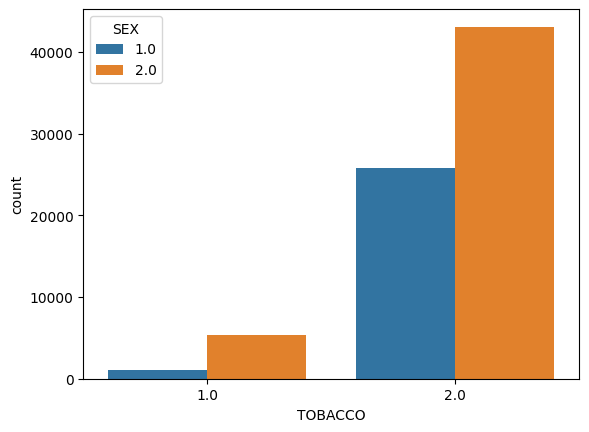

In [20]:
sns.countplot(x='TOBACCO', data=data[data['DEATH']==1], hue='SEX');

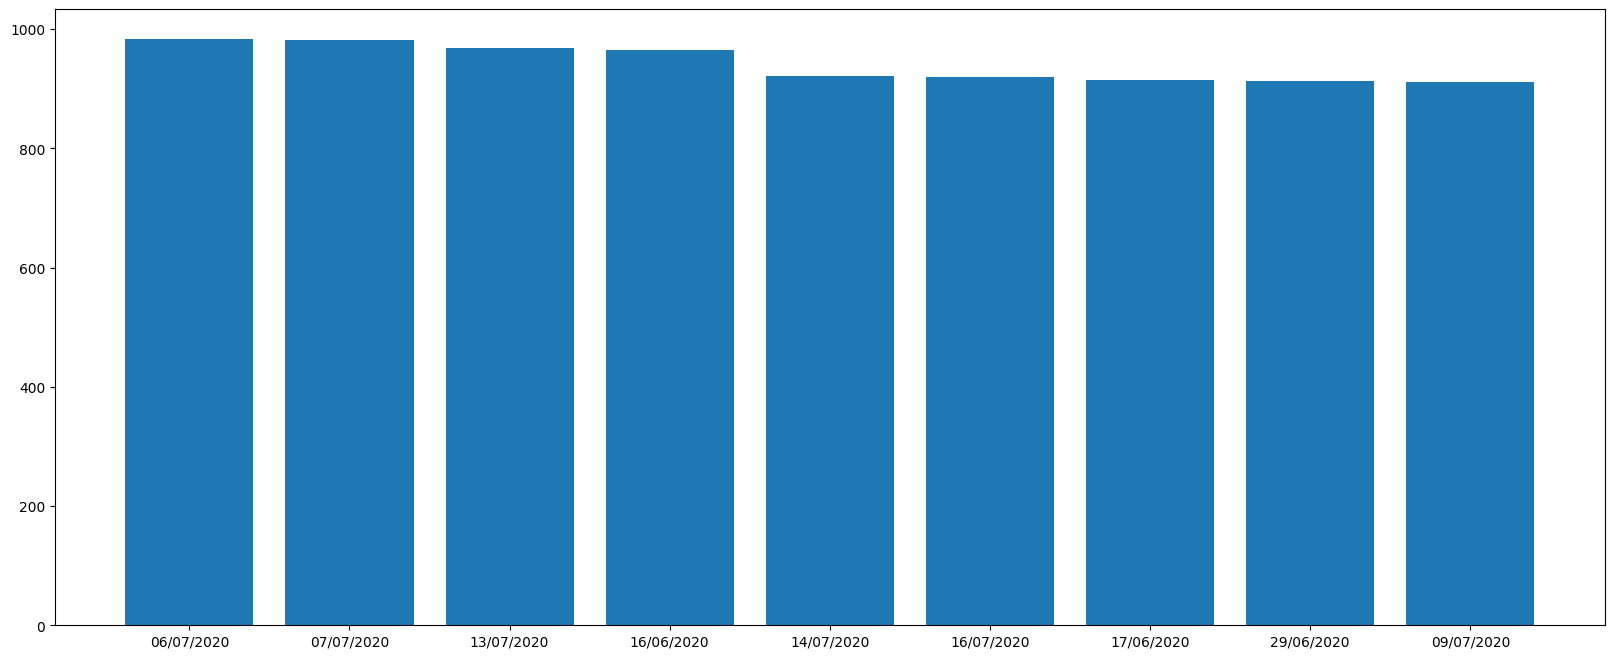

In [31]:
plt.figure(figsize=(20, 8))
plt.bar(x=data['DATE_DIED'].value_counts().head(10).iloc[1:].index, 
        height=data['DATE_DIED'].value_counts().head(10).iloc[1:].values);

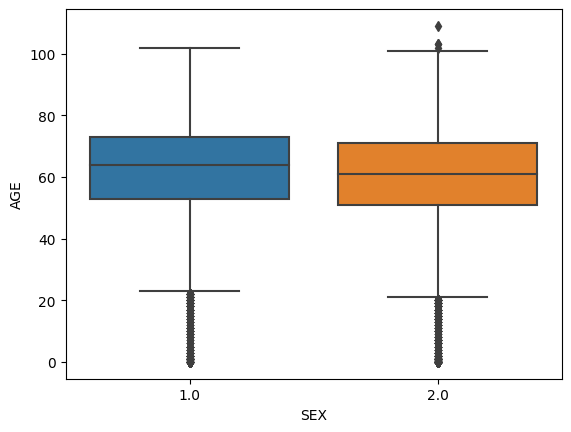

In [33]:
sns.boxplot(x='SEX', y='AGE', data=data[data['DEATH']==1]);

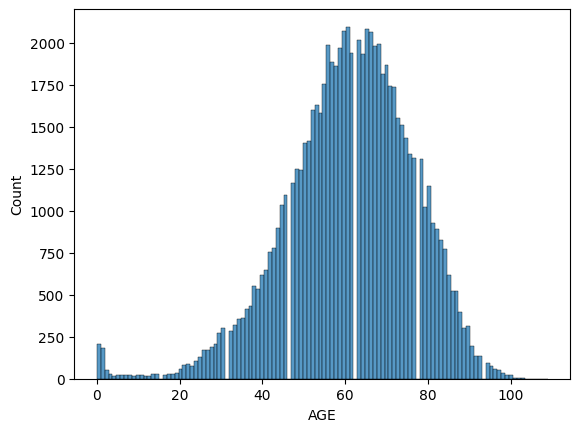

In [35]:
sns.histplot(x='AGE', data=data[data['DEATH']==1]);

## Dimension Reduction:

<img src="https://lazyprogrammer.me/wp-content/uploads/2015/11/PCA.jpg" style="height: 300px; width:300px;">

- Step 1: Get some data
- Step 2: Subtract the mean
- Step 3: Calculate the covariance matrix
- Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
- Step 5: Choosing components and forming a feature vector
- Step 6: Deriving the new data set

[PCA in Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [36]:
data = data.drop(columns=['DATE_DIED'])

In [37]:
y = data['DEATH']
X = data.drop(columns=['DEATH'])

In [38]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((832810, 17), (208203, 17), (832810,), (208203,))

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=5)

pca.fit(X_train)

PCA(n_components=5)

In [64]:
X_tr_pca = pca.transform(X_train)
X_ts_pca = pca.transform(X_test)

In [65]:
X_tr_pca.shape

(832810, 5)

## Model Fitting:

### Decision Tree:

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png">

- Information Gain
- Gain Ratio
- Gini Index

[Decision Tree in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

### Random Forest:
<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" style="height: 550px; width:700px;">

[Random Forest in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [66]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [67]:
clf = RFC(n_estimators=5)
# clf.fit(X_tr_pca, y_train)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [68]:
# y_pred = clf.predict(X_ts_pca)
y_pred = clf.predict(X_test)

## Model Evalution

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" style="height: 250px; width:500px;">


- $Accuracy = \frac{TP + TN}{N}$


- $Percision = \frac{TP}{TP + FP}$


- $Recall = \frac{TP}{TP + FN}$


- $F_1 Score = 2 \times \frac{Percision \times Recall}{Percision + Recall}$


[Metrics in Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [69]:
print('ACC is {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
print('Percision is {}'.format(precision_score(y_true=y_test, y_pred=y_pred)))
print('Recal is {}'.format(recall_score(y_true=y_test, y_pred=y_pred)))

ACC is 0.932239208849056
Percision is 0.5391429436705028
Recal is 0.47028133667943467


In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[186974,   6087],
       [  8021,   7121]])

<img src="https://scikit-learn.org/stable/_static/ml_map.png">